In [18]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
data=pd.read_csv("Health_insurance.csv")

In [20]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

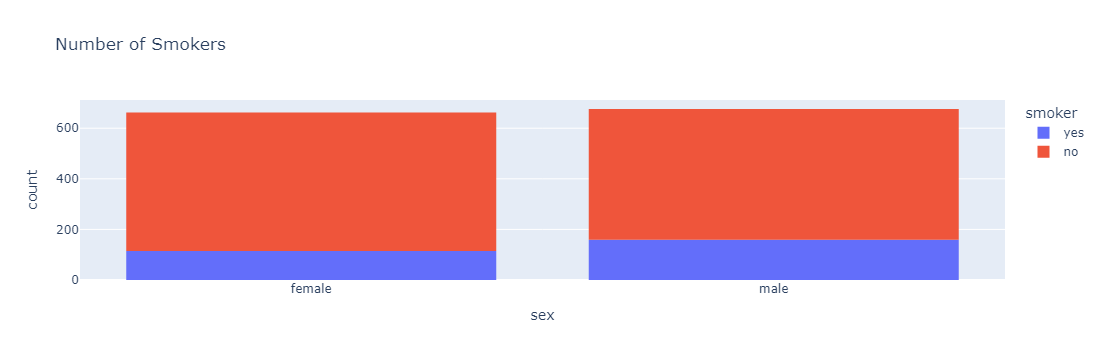

In [22]:
data = data
figure = px.histogram(data, x = "sex", color = "smoker", title= "Number of Smokers")
figure.show()

In [23]:
data["sex"] = data["sex"].map({"female": 0, "male": 1})
data["smoker"] = data["smoker"].map({"no": 0, "yes": 1})
print(data.head())

   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


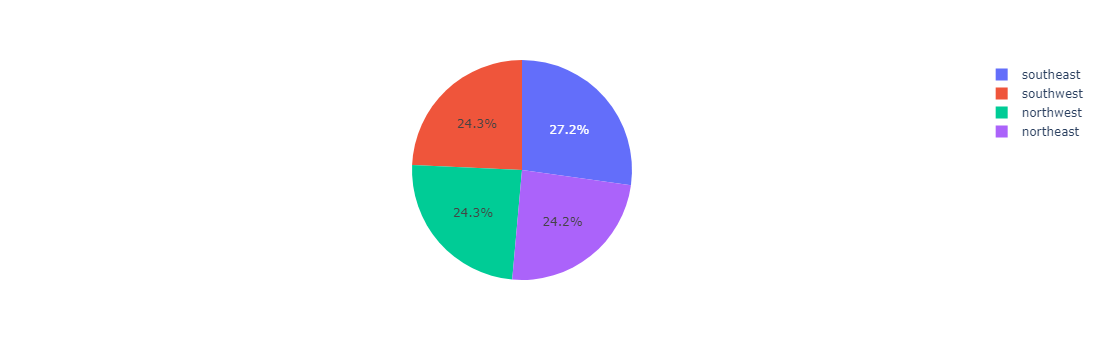

In [24]:
pie = data["region"].value_counts()
regions = pie.index
population = pie.values
fig = px.pie(data, values=population, names=regions)
fig.show()

In [25]:
x = np.array(data[["age", "sex", "bmi","children", "smoker"]])
y = np.array(data["charges"])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=40)

In [26]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [27]:
ypred=model.predict(xtest)
data = pd.DataFrame(data={"Predicted Premium Amount": ypred})
print(data.head())

   Predicted Premium Amount
0               5789.952131
1              28401.562012
2              11434.611916
3              12149.590262
4              24456.077270


In [28]:
import pickle

In [29]:
with open("insurance.pkl","wb") as file:
    pickle.dump(model,file)